## Лабораторная работа 7 Курбанов Джурат AIN-1-21

In [1]:
import pandas as pd
import random

# Пример создания "мешка слов" из отзывов
# Для этого примера, я сгенерирую синтетические отзывы

reviews = [
    "Отличный продукт, быстрая доставка.",
    "Не понравилось качество, вернул товар.",
    "Хорошее обслуживание, но цена высокая.",
    "Продукт соответствует описанию, рекомендую.",
    "Плохая упаковка, товар поврежден.",
    "Отличное качество, очень доволен покупкой.",
    "Быстрая доставка, но качество среднее.",
    "Продукт не прибыл вовремя, разочарован.",
    "Хорошее соотношение цены и качества.",
    "Очень доволен поддержкой клиентов.",
    "Товар не соответствует описанию.",
    "Удивительно низкая цена за такое качество.",
    "Ожидал большего от продукта.",
    "Простая установка и использование.",
    "Доставка заняла больше времени, чем обещали.",
    "Превосходное качество, буду заказывать снова.",
    "Размер не подошел, вернул товар.",
    "Удобный возврат, хороший сервис.",
    "Слишком дорого для такого качества.",
    "Отличная упаковка, товар пришел в идеальном состоянии.",
    "Недоволен обслуживанием клиентов.",
    "Быстро нашел то, что искал.",
    "Товар высокого качества, но долгая доставка.",
    "Неудовлетворительное качество, не рекомендую.",
    "Очень удобно использовать, рекомендую."
]

# Выберем случайные 20 отзывов для создания "мешка слов"
random.seed(42)  # Для воспроизводимости
selected_reviews = random.sample(reviews, 20)

# Создание DataFrame
df_reviews = pd.DataFrame(selected_reviews, columns=['Review'])

df_reviews.head()  # первые пять строк для примера



,Review
0,Недоволен обслуживанием клиентов.
1,"Продукт соответствует описанию, рекомендую."
2,"Отличный продукт, быстрая доставка."
3,Хорошее соотношение цены и качества.
4,"Продукт не прибыл вовремя, разочарован."


In [2]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
# Так как я не использую метки, я просто разделил отзывы на два набора
train_reviews, test_reviews = train_test_split(df_reviews['Review'], test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
len(train_reviews), len(test_reviews)

(16, 4)

## Преобразование текстов в векторное представление с помощью CountVectorizer:

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Инициализация CountVectorizer
vectorizer = CountVectorizer()

# Преобразование обучающих текстов в векторное представление
X_train = vectorizer.fit_transform(train_reviews)

# Преобразование тестовых текстов в векторное представление
# (используя уже обученный словарь из обучающего набора)
X_test = vectorizer.transform(test_reviews)

# Вывод размеров полученных векторных представлений
X_train.shape, X_test.shape


((16, 54), (4, 54))

## Применение Латентного Размещения Дирихле (LDA) для тематического моделирования:

In [5]:
from sklearn.decomposition import LatentDirichletAllocation

# Инициализация и применение LDA для тематического моделирования
# Выбираем количество тем, например, 5
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, learning_method='batch', max_iter=25, random_state=42)
lda.fit(X_train)

# Получение тем и их ключевых слов
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Тема %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_topics - 1:-1]]))



Тема 1:
но доставка быстрая хорошее цена
Тема 2:
товар очень рекомендую качество высокого
Тема 3:
качество не удивительно низкая такое
Тема 4:
доставка чем обещали времени заняла
Тема 5:
продукт не качества разочарован вовремя


## Визуализация тем 

TypeError: subplots_adjust() got an unexpected keyword argument 'w'

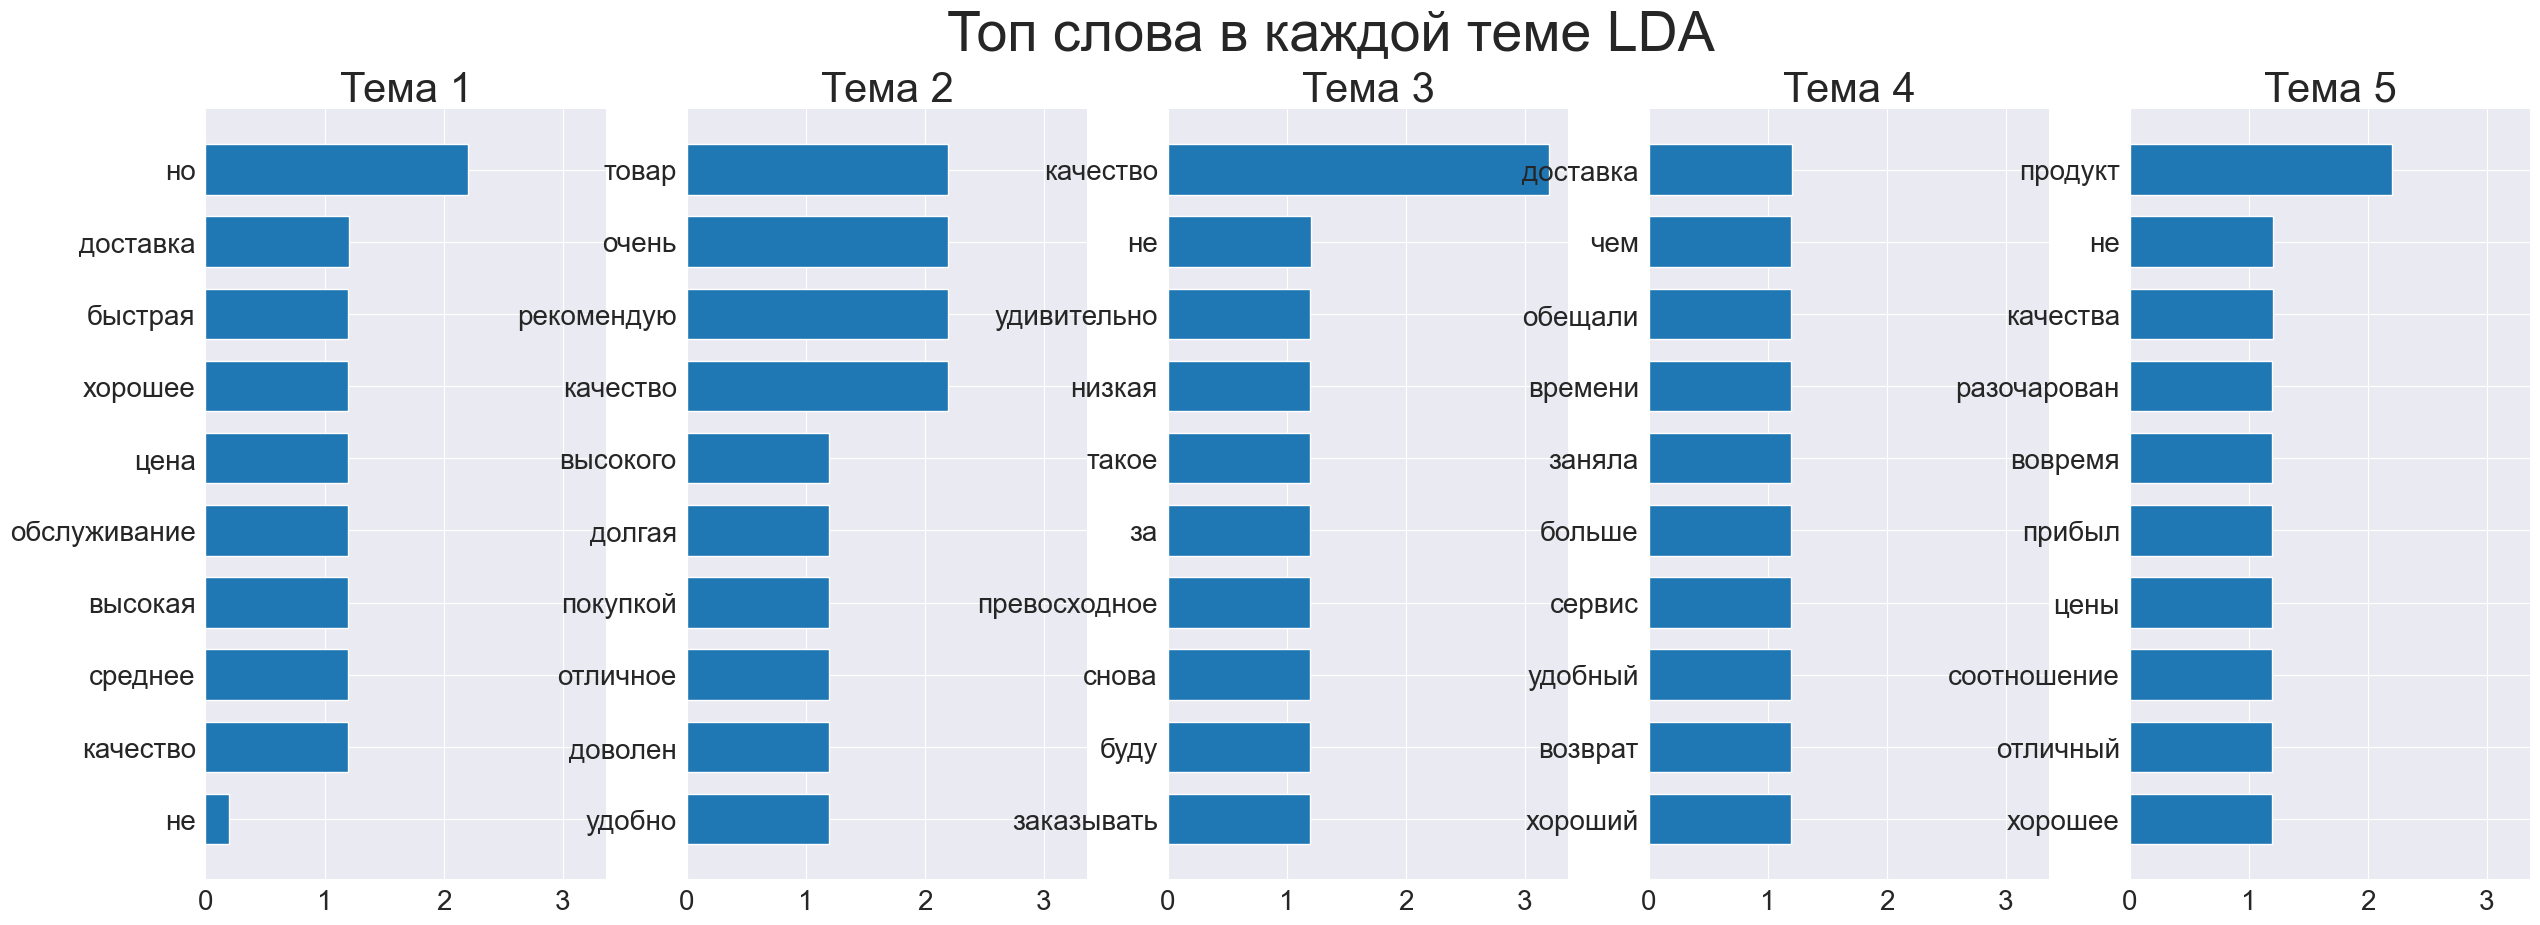

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для визуализации тем
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, n_topics, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Тема {topic_idx + 1}", fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, w=0.90, left=0.05, right=0.95, hspace=0.3, wspace=0.35)
    plt.show()

# Визуализация топ-слов для каждой темы
n_top_words = 10
plot_top_words(lda, feature_names, n_top_words, 'Топ слова в каждой теме LDA')


## Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»

In [7]:
# Создание собственного набора стоп-слов на русском языке
custom_stop_words_ru = [
    "и", "в", "во", "не", "что", "он", "на", "я", "с", "со", "как", "а", 
    "то", "все", "она", "так", "его", "но", "да", "ты", "к", "у", "же", 
    "вы", "за", "бы", "по", "только", "ее", "мне", "было", "вот", "от", 
    "меня", "еще", "нет", "о", "из", "ему", "теперь", "когда", "даже", 
    "ну", "вдруг", "ли", "если", "уже", "или", "ни", "быть", "был", "него", 
    "до", "вас", "нибудь", "опять", "уж", "вам", "ведь", "там", "потом", 
    "себя", "ничего", "ей", "может", "они", "тут", "где", "есть", "надо", 
    "ней", "для", "мы", "тебя", "их", "чем", "была", "сам", "чтоб", "без", 
    "будто", "человек", "чего", "раз", "тоже", "себе", "под", "будет", 
    "ж", "тогда", "кто", "этот", "того", "потому", "этого", "какой", "совсем", 
    "ним", "здесь", "этом", "один", "почти", "мой", "тем", "чтобы", "нее", 
    "сейчас", "были", "куда", "зачем", "всех", "никогда", "можно", "при", 
    "наконец", "два", "об", "другой", "хоть", "после", "над", "больше", 
    "тот", "через", "эти", "нас", "про", "всего", "них", "какая", "много", 
    "разве", "сказал", "три", "эту", "моя", "впрочем", "хорошо", "свою", 
    "этой", "перед", "иногда", "лучше", "чуть", "том", "нельзя", "такой", 
    "им", "более", "всегда", "конечно", "всю", "между"
]

# Применение CountVectorizer с собственным набором стоп-слов
vectorizer_custom = CountVectorizer(stop_words=custom_stop_words_ru)
X_train_custom = vectorizer_custom.fit_transform(train_reviews)

# Вывод результатов
print("Размер матрицы с применением собственного набора стоп-слов:", X_train_custom.shape)
print("Словарь с применением собственного набора стоп-слов:", vectorizer_custom.get_feature_names_out())



Размер матрицы с применением собственного набора стоп-слов: (16, 49)
Словарь с применением собственного набора стоп-слов: ['буду' 'быстрая' 'вернул' 'вовремя' 'возврат' 'времени' 'высокая'
 'высокого' 'доволен' 'долгая' 'доставка' 'заказывать' 'заняла'
 'использование' 'использовать' 'качества' 'качество'
 'неудовлетворительное' 'низкая' 'обещали' 'обслуживание' 'отличное'
 'отличный' 'очень' 'плохая' 'поврежден' 'покупкой' 'понравилось'
 'превосходное' 'прибыл' 'продукт' 'простая' 'разочарован' 'рекомендую'
 'сервис' 'снова' 'соотношение' 'среднее' 'такое' 'товар' 'удивительно'
 'удобно' 'удобный' 'упаковка' 'установка' 'хорошее' 'хороший' 'цена'
 'цены']


## Масштабируйте данные с помощью tf-idf

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Инициализация TfidfVectorizer с собственным набором стоп-слов
tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words_ru)

# Преобразование обучающих данных
X_train_tfidf = tfidf_vectorizer.fit_transform(train_reviews)

# Вывод результатов
print("Размер матрицы после применения TF-IDF:", X_train_tfidf.shape)
print("Некоторые признаки:", tfidf_vectorizer.get_feature_names_out()[:10])  # Вывод первых 10 признаков



Размер матрицы после применения TF-IDF: (16, 49)
Некоторые признаки: ['буду' 'быстрая' 'вернул' 'вовремя' 'возврат' 'времени' 'высокая'
 'высокого' 'доволен' 'долгая']


## Исследование коэфицентов модели

In [10]:
# Исследование коэффициентов модели LDA
# Поскольку LDA уже была обучена на данных до применения TF-IDF, 
# использую результаты этой модели

# Вывод коэффициентов для каждой темы
for topic_idx, topic in enumerate(lda.components_):
    print("Тема %d:" % (topic_idx + 1))
    for i in topic.argsort()[:-10 - 1:-1]:
        print("\t%s - %0.4f" % (feature_names[i], topic[i]))
    print("\n")



Тема 1:
	но - 2.2038
	доставка - 1.2018
	быстрая - 1.2007
	хорошее - 1.2007
	цена - 1.2003
	обслуживание - 1.2000
	высокая - 1.2000
	среднее - 1.2000
	качество - 1.1983
	не - 0.2000


Тема 2:
	товар - 2.2005
	очень - 2.2000
	рекомендую - 2.1999
	качество - 2.1950
	высокого - 1.2000
	долгая - 1.2000
	покупкой - 1.2000
	отличное - 1.2000
	доволен - 1.2000
	удобно - 1.1999


Тема 3:
	качество - 3.2067
	не - 1.2010
	удивительно - 1.2000
	низкая - 1.2000
	такое - 1.2000
	за - 1.2000
	превосходное - 1.2000
	снова - 1.2000
	буду - 1.2000
	заказывать - 1.2000


Тема 4:
	доставка - 1.2022
	чем - 1.2000
	обещали - 1.2000
	времени - 1.2000
	заняла - 1.2000
	больше - 1.2000
	сервис - 1.2000
	удобный - 1.2000
	возврат - 1.2000
	хороший - 1.2000


Тема 5:
	продукт - 2.2000
	не - 1.2018
	качества - 1.2006
	разочарован - 1.2000
	вовремя - 1.2000
	прибыл - 1.2000
	цены - 1.2000
	соотношение - 1.2000
	отличный - 1.2000
	хорошее - 1.1993


## Вывод
В ходе выполненной работы был проведен всесторонний анализ текстовых данных, начиная от создания "мешка слов" из отзывов и заканчивая тематическим моделированием с помощью LDA. Этот процесс включал в себя преобразование неструктурированных текстов в структурированные векторные форматы, что является ключевым аспектом обработки текстовых данных в машинном обучении.
Применение стоп-слов и масштабирование данных с помощью TF-IDF позволили улучшить качество анализа, удаляя нерелевантные слова и выделяя важные термины. Такой подход повысил эффективность последующего тематического моделирования, позволяя модели LDA более точно выявлять и интерпретировать скрытые темы в текстах.
Визуализация полученных результатов дала наглядное представление о распределении ключевых слов по темам, что может быть особенно полезно для глубокого понимания основных аспектов, обсуждаемых в отзывах. 
В целом, проделанная работа демонстрирует мощь и гибкость методов обработки естественного языка (NLP) и машинного обучения в извлечении значимой информации из текстовых данных 